Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,Would_live_in_another_neighborhood,District,Gender,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,Barri_satisfaction_of_living,BCN_satisfaction_of_living,...,Financial_situation,Help_with_housework,Disability,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,0.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS THE SAME,IT WILL GET WORSE,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL GET WORSE,IT WILL GET WORSE,SATISFIED,SATISFIED,...,BAD,0.0,0.0,0,1,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,0,0,0,0,0,0,0
4,1.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,FAIRLY SATISFIED,SATISFIED,...,BAD,0.0,1.0,1,0,0,1,0,0,0
5,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS THE SAME,IT WILL STAY THE SAME,IT WILL IMPROVE,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,1,0,1,0,0,0,0


In [5]:
data.shape

(1174, 31)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    1019
1.0     155
dtype: int64

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [8]:
x_var = data.columns.tolist()

In [95]:
x_var = ['District',
 'Gender',
 'Time_living_in_barri',
 #'Barri_evolution',
 #'BCN_evolution',
 #'Barri_future',
 #'BCN_future',
 'Barri_satisfaction_of_living',
 #'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 #'BCN_citizen_security',
 #'Barri_management',
 #'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 #'BCN_transport',
 #'Owns_a_car',
 #'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 #'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 #'BCN_over_barri_future',
 #'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']
 #'BCN_over_barri_management',
 #'BCN_over_barri_citizen_security']

In [102]:
x = data[x_var]

In [103]:
y = data['Would_live_in_another_neighborhood']

In [104]:
x = pd.get_dummies(x)

In [105]:
x.columns.tolist()

['Gender',
 'Barri_association',
 'Help_with_housework',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 'BCN_over_barri_transport',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_satisfaction_of_living_FAIRLY SATISFIED',
 'Barri_satisfaction_of_living_NOT SATISFIED',
 'Barri_satisfaction_of_living_SATISFIED',
 'Barri_citizen_security_BAD',
 'Barri_citizen_security_GOOD',
 'Barri_citizen_security_NEITHER BAD, NOR GOOD',
 'Barri_comparison_NEITHER THE BEST, NOR THE WORST',
 'Barri_comparison_ONE OF THE BEST',
 'Barri_comparison_ONE OF THE WORST',
 'Barri_transport_BAD',
 'Barri_transport_GOOD',
 'Barri_tran

In [106]:
for i in x.columns.tolist():
    if i[-5:] == '_GOOD':
        del x[i]        

In [107]:
for i in ['District_CIUTAT VELLA',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Barri_satisfaction_of_living_SATISFIED',
 'Barri_comparison_ONE OF THE BEST',
 'House_size_< 50 M2']:
    del x[i]

In [108]:
x = sm.add_constant(x)

In [109]:
resampling = SMOTETomek(random_state=0, sampling_strategy=0.5)
 
columns = x.columns
x_resampled, y_resampled = resampling.fit_sample(x.astype(int), y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_live_in_another_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is ",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is ",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0])/len(x_resampled))

length of oversampled data is  1472
Number of people who would not stay in the neighborhood in resampled data 481
Number of people who would stay in the neighborhood in resampled data 991
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is  0.3267663043478261
Proportion of subscription data in resampled data is  0.673233695652174


In [110]:
x_resampled

,const,Gender,Barri_association,Help_with_housework,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_transport,District_EIXAMPLE,District_GRÀCIA,District_HORTA - GUINARDÓ,...,"Barri_citizen_security_NEITHER BAD, NOR GOOD","Barri_comparison_NEITHER THE BEST, NOR THE WORST",Barri_comparison_ONE OF THE WORST,Barri_transport_BAD,"Barri_transport_NEITHER BAD, NOR GOOD",House_size_101-150 M2,House_size_51-100 M2,House_size_> 150 M2,House_size_I DON'T KNOW,Financial_situation_BAD
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
4,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1468,1,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1469,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1470,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [111]:
y_resampled['Would_live_in_another_neighborhood'].unique()

array([0., 1.])

In [112]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.450841
         Iterations 7
                                         Results: Logit
Model:                   Logit                                  Pseudo R-squared:     0.286     
Dependent Variable:      Would_live_in_another_neighborhood     AIC:                  1389.2770 
Date:                    2021-05-03 21:42                       BIC:                  1553.4027 
No. Observations:        1472                                   Log-Likelihood:       -663.64   
Df Model:                30                                     LL-Null:              -930.11   
Df Residuals:            1441                                   LLR p-value:          2.0747e-93
Converged:               1.0000                                 Scale:                1.0000    
No. Iterations:          7.0000                                                                 
------------------------------------------------------------------

In [113]:
result.pvalues.sort_values(ascending=False)

Barri_transport_BAD                                 7.801966e-01
Barri_satisfaction_of_living_FAIRLY SATISFIED       7.027490e-01
Time_living_in_barri_LESS THAN 10 YEARS             6.420267e-01
Barri_transport_NEITHER BAD, NOR GOOD               3.062851e-01
Barri_citizen_security_BAD                          1.780038e-01
Time_living_in_barri_MORE THAN 10 YEARS             1.738207e-01
Living_with_disabled_person                         1.729585e-02
Help_with_housework                                 1.213107e-02
Barri_citizen_security_NEITHER BAD, NOR GOOD        5.573175e-03
BCN_over_barri_transport                            2.693356e-03
Financial_situation_BAD                             2.061170e-03
House_size_> 150 M2                                 1.471055e-03
Barri_satisfaction_of_living_NOT SATISFIED          1.376027e-03
Barri_comparison_ONE OF THE WORST                   9.574682e-04
BCN_over_barri_evolution                            4.204774e-04
Gender                   

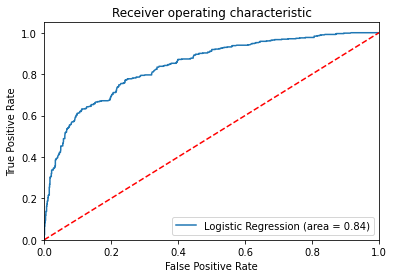

In [114]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [117]:
np.exp(result.params)

const                                               12.515245
Gender                                               0.604108
Barri_association                                    0.430234
Help_with_housework                                  0.648450
Living_with_disabled_person                          0.681165
BCN_over_barri_evolution                             0.339929
BCN_over_barri_transport                             0.184605
District_EIXAMPLE                                    0.109800
District_GRÀCIA                                      0.120101
District_HORTA - GUINARDÓ                            0.160632
District_LES CORTS                                   0.038537
District_NOU BARRIS                                  0.189759
District_SANT ANDREU                                 0.215558
District_SANT MARTÍ                                  0.103762
District_SANTS - MONTJUÏC                            0.195513
District_SARRIÀ - SANT GERVASI                       0.026414
Time_liv

In [31]:
result.pred_table()

array([[941.,  64.],
       [130., 359.]])